#### Introduction
Across America, inequalities in regards to healthcare are still prevelant, particularly when it comes to child birth. This analysis will attempt to derive statistically some of the trends in child birth based on data from 2016 to 2021 in the US. 

#### Set up the notebook environment by importing the required libraries

In [24]:
import pandas as pd #data processing for the CSV file
import numpy as np #algebra
import matplotlib.pyplot as mp #for visualizations
import seaborn as sns #also for visualizations

#### Read data

In [25]:
data = pd.read_csv(r"C:\Users\lsmit\OneDrive\Desktop\UsBirthsProject_111\usBirths.csv.csv")

In [26]:
data.head()

,State,State Abbreviation,Year,Gender,Education Level of Mother,Education Level Code,Number of Births,Average Age of Mother (years),Average Birth Weight (g)
0,Alabama,AL,2016,F,8th grade or less,1,1052,27.8,3116.9
1,Alabama,AL,2016,F,9th through 12th grade with no diploma,2,3436,24.1,3040.0
2,Alabama,AL,2016,F,High school graduate or GED completed,3,8777,25.4,3080.0
3,Alabama,AL,2016,F,"Some college credit, but not a degree",4,6453,26.7,3121.9
4,Alabama,AL,2016,F,"Associate degree (AA, AS)",5,2227,28.9,3174.3


### Variable Description
-State  
-State Abbreviation  
-Year  
-Gender  
-Education Level of the Mother  
-Education Level Code (the lower number equals less education)  
-Number of Births  
-Average age of Mother  
-Average Birth Weight  

**Features**: The dataset has the following data types that we will be using

**Categorical/Nominal: Categories that have no inherent order or ranking.** -State, Gender

**Ordinal: Categories that have a meaningful order or ranking, but the intervals between ranks are not uniform or meaningful.** -Education Level

**Interval: Numeric values where the intervals between values are meaningful and equal, but there is no true zero** - Year

**Ratio: Numeric values with a meaningful zero point and equal intervals between values.** -AVG birth weight, AVG age of mother, number of births

**Useless Data:** - Education Level Code, state abbreviation





####  Fetch some info about data by .info()

In [27]:
print("Shape of data is :",data.shape)
print("*"*100)
data.info()

Shape of data is : (5496, 9)
****************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5496 entries, 0 to 5495
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          5496 non-null   object 
 1   State Abbreviation             5496 non-null   object 
 2   Year                           5496 non-null   int64  
 3   Gender                         5496 non-null   object 
 4   Education Level of Mother      5496 non-null   object 
 5   Education Level Code           5496 non-null   int64  
 6   Number of Births               5496 non-null   int64  
 7   Average Age of Mother (years)  5496 non-null   float64
 8   Average Birth Weight (g)       5496 non-null   float64
dtypes: float64(2), int64(3), object(4)
memory usage: 386.6+ KB


##### Observations:

1. Our data has 5496 rows and 9 columns, meaning we have data on 5496 births. 
2. All columns show non-null values, meaning we are missing no values.
3. All columns are appropriately typed, based on this fact, data is ready for analysis. 
4. float64(2): AVG age of mother, AVG birth weight
5. int64(3): Num of births, Education level code(not used), Year
6. object(4): State, State Abbreviation(not used), Gender, Education level of mother



##### Questions to ask the Data:

1. What state has the lowest average birth weight?
2. What is the overall birth rate from year to year? 
3. What ecuation catagory has the highest / lowest number of births?
4. What state has the highest / lowest birth rate per capita?
5. ~~~~~~~Something like education level and corelation to birth count~~~~~~~~
6. What states are facing a decline or rise in average birth weight?

##### State with the Lowest Average Birth Weight:

Starting with State with the Lowest Average Birth Weight, I am going to sum each states birth weights and divide by the count of State Births. This should give me the State with the Lowest Average Birth Weight.

In [28]:
# group states together by name, then sum the birth weights from each respective state and count the births of each individual state

#data is the variable name of my dataset

#I'm pulling from the state column, summing the count of births by state, then dividing count of births by total average birth weight

result = data.groupby('State').agg(
    totalBirthWeight = ('Average Birth Weight (g)', lambda x: (x * data.loc[x.index, 'Number of Births']).sum()),
    totalBirths = ('Number of Births', 'sum')
)

#calculate the average birth weight
result['Average Birth Weight (g)'] = result['totalBirthWeight'] / result['totalBirths']
result = result.drop(columns = ['totalBirthWeight'])

print(result)

lowestAvgbirthWeight = result['Average Birth Weight (g)'].min()
lowestAvgbirthWeightState = result['Average Birth Weight (g)'].idxmin()

highestAvgbirthWeight = result['Average Birth Weight (g)'].max()
highestAvgbirthWeightState = result['Average Birth Weight (g)'].idxmax()

print("The lowest average birth weight: ", (lowestAvgbirthWeight))
print("State with the lowest average birth weight: ", (lowestAvgbirthWeightState))

print("The highest average birth weight: ",(highestAvgbirthWeight))
print("State with the highest average birth weight: ", (highestAvgbirthWeightState))



                      totalBirths  Average Birth Weight (g)
State                                                      
Alabama                    350169               3184.962896
Alaska                      60398               3388.632456
Arizona                    481353               3277.514747
Arkansas                   220592               3226.978338
California                2702751               3285.703391
Colorado                   381192               3185.445039
Connecticut                209349               3283.845901
Delaware                    63904               3245.087386
District of Columbia        55243               3204.622321
Florida                   1316127               3234.383548
Georgia                    758374               3196.788365
Hawaii                     100750               3225.981882
Idaho                      132089               3296.953799
Illinois                   854265               3258.837252
Indiana                    486328       

#### Visualization On Average Birth Weight By State

C:\Users\Laura Ozorio\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Distribution of Total Births and Average Birth Weight')

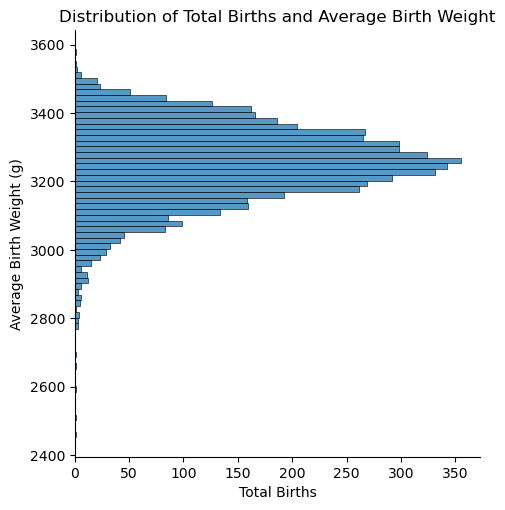

In [29]:
sns.displot(data, y = 'Average Birth Weight (g)', kind = "hist" )

mp.xlabel('Total Births')
mp.ylabel('Average Birth Weight (g)')
mp.title('Distribution of Total Births and Average Birth Weight')

#### What is the overall birth rate from year to year? 

In [30]:
count_YearlyBirths = data.groupby('Year').agg(
    totalBirths = ('Number of Births', 'sum')
)

print(count_YearlyBirths)

      totalBirths
Year             
2016      3945853
2017      3855479
2018      3791707
2019      3747531
2020      3613633
2021      3664277


<Axes: xlabel='Year', ylabel='Number of Births'>

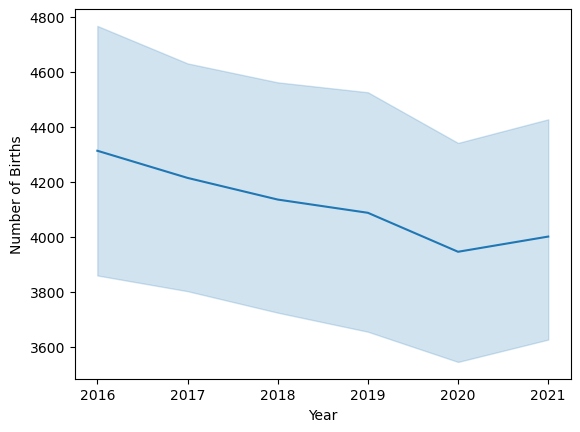

In [38]:
YearlyData = data.query("Year == 'Number of Births'")
sns.lineplot(data=data, x="Year", y="Number of Births")